In [ ]:
!gdown 'https://drive.google.com/uc?export=download&id=1JyNUXUC3ScgHTyBVoNb3-yLT7eCPxPGo&confirm=t&uuid=03250e1d-6d94-40ce-a07a-f2894fed61eb&at=AKKF8vyg94wDVv1TDvoaD8XVK2_W:1683115776234'

Downloading...
From: https://drive.google.com/uc?export=download&id=1JyNUXUC3ScgHTyBVoNb3-yLT7eCPxPGo&confirm=t&uuid=03250e1d-6d94-40ce-a07a-f2894fed61eb&at=AKKF8vyg94wDVv1TDvoaD8XVK2_W:1683115776234
To: /content/blueberry_data_text_annot.zip
100% 529M/529M [00:03<00:00, 160MB/s]


In [ ]:
!unzip blueberry_data_text_annot.zip

Archive:  blueberry_data_text_annot.zip
  inflating: blueberry_data/data.yaml  
   creating: blueberry_data/test/
   creating: blueberry_data/test/images/
  inflating: blueberry_data/test/images/R8.1 P002.jpg  
  inflating: blueberry_data/test/images/R8.1 P006.jpg  
  inflating: blueberry_data/test/images/R8.1 P011.jpg  
  inflating: blueberry_data/test/images/R8.1 P015.jpg  
  inflating: blueberry_data/test/images/R8.1 P029.jpg  
  inflating: blueberry_data/test/images/R8.1 P032.jpg  
  inflating: blueberry_data/test/images/R8.1 P033.jpg  
  inflating: blueberry_data/test/images/R8.1 P044.jpg  
  inflating: blueberry_data/test/images/R8.1 P045.jpg  
  inflating: blueberry_data/test/images/R8.1 P051.jpg  
  inflating: blueberry_data/test/images/R8.1 P060.jpg  
  inflating: blueberry_data/test/images/R8.1 P067.jpg  
  inflating: blueberry_data/test/images/R8.1 P074.jpg  
  inflating: blueberry_data/test/images/R8.1 P081.jpg  
  inflating: blueberry_data/test/images/R8.2 P108.jpg  
  inf

In [ ]:
!gdown 'https://drive.google.com/uc?export=download&id=1Vx4xd6twUDqQuk7F0A8ILrpOXn0H08bi'

Downloading...
From: https://drive.google.com/uc?export=download&id=1Vx4xd6twUDqQuk7F0A8ILrpOXn0H08bi
To: /content/final_model.h5
100% 671M/671M [00:08<00:00, 79.8MB/s]


In [ ]:
!gdown 'https://drive.google.com/uc?export=download&id=1817ymV9wCk4ij_xRuhkIuLKJIxfPCOyD'
!unzip selective_search_test.zip

Downloading...
From: https://drive.google.com/uc?export=download&id=1817ymV9wCk4ij_xRuhkIuLKJIxfPCOyD
To: /content/selective_search_test.zip
100% 2.98M/2.98M [00:00<00:00, 274MB/s]
Archive:  selective_search_test.zip
  inflating: selective_search_test/R8.1 P002.npy  
  inflating: selective_search_test/R8.1 P006.npy  
  inflating: selective_search_test/R8.1 P011.npy  
  inflating: selective_search_test/R8.1 P015.npy  
  inflating: selective_search_test/R8.1 P029.npy  
  inflating: selective_search_test/R8.1 P032.npy  
  inflating: selective_search_test/R8.1 P033.npy  
  inflating: selective_search_test/R8.1 P044.npy  
  inflating: selective_search_test/R8.1 P045.npy  
  inflating: selective_search_test/R8.1 P051.npy  
  inflating: selective_search_test/R8.1 P060.npy  
  inflating: selective_search_test/R8.1 P067.npy  
  inflating: selective_search_test/R8.1 P074.npy  
  inflating: selective_search_test/R8.1 P081.npy  
  inflating: selective_search_test/R8.2 P108.npy  
  inflating: selec

In [ ]:
import random
import cv2
import matplotlib.pyplot as plt
import os,cv2,keras
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import pandas as pd
import time

def generate_bounding_boxes(image, region, num_boxes):
    height, width, _ = image.shape
    boxes = []
    
    if region == 'top-left':
        x_min, x_max = 0, width//2
        y_min, y_max = 0, height//2
    elif region == 'top-right':
        x_min, x_max = width//2, width
        y_min, y_max = 0, height//2
    elif region == 'top-middle':
        x_min, x_max = width//4, 3*width//4
        y_min, y_max = 0, height//2
    elif region == 'middle-left':
        x_min, x_max = 0, width//2
        y_min, y_max = height//4, 3*height//4
    elif region == 'middle-right':
        x_min, x_max = width//2, width
        y_min, y_max = height//4, 3*height//4
    elif region == 'middle':
        x_min, x_max = width//4, 3*width//4
        y_min, y_max = height//4, 3*height//4
    elif region == 'bottom-left':
        x_min, x_max = 0, width//2
        y_min, y_max = 3*height//4, height
    elif region == 'bottom-right':
        x_min, x_max = width//2, width
        y_min, y_max = 3*height//4, height
    elif region == 'bottom-middle':
        x_min, x_max = width//4, 3*width//4
        y_min, y_max = 3*height//4, height
        
    for i in range(num_boxes):
        # Generate a random box size between 100 and 300 pixels
        box_width = random.randint(100, 300)
        box_height = random.randint(100, 300)
        
        # Generate a random box position within the specified region
        x = random.randint(x_min, x_max)
        y = random.randint(y_min, y_max)
        
        # Ensure the box is within the image boundaries
        x1 = max(x - box_width//2, 0)
        y1 = max(y - box_height//2, 0)
        x2 = min(x + box_width//2, width)
        y2 = min(y + box_height//2, height)
        
        # Append the box coordinates to the list of boxes
        boxes.append((x1, y1, x2, y2))
        
        # Draw the box on the image for visualization
#         cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)
    
    return boxes

def yolo_to_bbox(x, y, w, h, img_width, img_height):
    # Convert the center_x and center_y coordinates to absolute coordinates
    x_abs = x * img_width
    y_abs = y * img_height

    # Calculate the top-left and bottom-right coordinates
    x1 = int(x_abs - w * img_width / 2)
    y1 = int(y_abs - h * img_height / 2)
    x2 = int(x_abs + w * img_width / 2)
    y2 = int(y_abs + h * img_height / 2)

    # Return the bounding box coordinates
    bbox = (x1, y1, x2, y2)
    return bbox

def get_iou(bb1, bb2):
  # assuring for proper dimension.
    assert bb1['x1'] < bb1['x2']
    assert bb1['y1'] < bb1['y2']
    assert bb2['x1'] < bb2['x2']
    assert bb2['y1'] < bb2['y2']
  # calculating dimension of common area between these two boxes.
    x_left = max(bb1['x1'], bb2['x1'])
    y_top = max(bb1['y1'], bb2['y1'])
    x_right = min(bb1['x2'], bb2['x2'])
    y_bottom = min(bb1['y2'], bb2['y2'])
  # if there is no overlap output 0 as intersection area is zero.
    if x_right < x_left or y_bottom < y_top:
        return 0.0
  # calculating intersection area.
    intersection_area = (x_right - x_left) * (y_bottom - y_top)
  # individual areas of both these bounding boxes.
    bb1_area = (bb1['x2'] - bb1['x1']) * (bb1['y2'] - bb1['y1'])
    bb2_area = (bb2['x2'] - bb2['x1']) * (bb2['y2'] - bb2['y1'])
  # union area = area of bb1_+ area of bb2 - intersection of bb1 and bb2.
    iou = intersection_area / float(bb1_area + bb2_area - intersection_area)
    assert iou >= 0.0
    assert iou <= 1.0
    return iou

In [ ]:
image = cv2.imread('blueberry_data/train/images/R8.1 P024.jpg')
start = time.time()
cv2.setUseOptimized(True);
ss = cv2.ximgproc.segmentation.createSelectiveSearchSegmentation()
ss.setBaseImage(image)
ss.switchToSelectiveSearchFast()

rects = ss.process()
end = time.time()
print(end-start)

63.29588460922241


In [ ]:
train_images=[]
train_labels=[]
annot = 'blueberry_data/train/labels'
path = 'blueberry_data/train/images'
text_annot_path = 'blueberry_data/train/text_data'

In [ ]:
for e,i in enumerate(os.listdir(annot)):
#     try:
        name_splitted = i.split(".")
        filename = name_splitted[0] + "." + name_splitted[1] +".jpg"
        text_annot_filename = name_splitted[0] + "." + name_splitted[1] +".txt"
        print(e,filename)
        image = cv2.imread(os.path.join(path,filename))
        img_h, img_w, _ = image.shape
        gtvalues=[]
            
        with open(os.path.join(annot,i)) as f:
            lines = f.readlines()

        for line in lines:
            label, yolo_x, yolo_y, yolo_w, yolo_h = line.split(" ")
            x1, y1, x2, y2 = yolo_to_bbox(float(yolo_x), float(yolo_y), float(yolo_w), float(yolo_h), img_w, img_h)
            gtvalues.append({"x1":x1,"x2":x2,"y1":y1,"y2":y2})
            
        with open(os.path.join(text_annot_path,text_annot_filename), "r") as f:
            textannot = f.read().strip()
        
#         ss.setBaseImage(image)   # setting given image as base image
#         ss.switchToSelectiveSearchFast()     # running selective search on base image 
        ssresults = generate_bounding_boxes(image, textannot, 1000)
        imout = image.copy()
        
        counter = 0
        falsecounter = 0
        flag = 0
        fflag = 0
        bflag = 0
        for e,result in enumerate(ssresults):
            if e < 2000 and flag == 0:     # till 2000 to get top 2000 regions only
                for gtval in gtvalues:
                    x,y,w,h = result
                    iou = get_iou(gtval,{"x1":x,"x2":x+w,"y1":y,"y2":y+h})  # calculating IoU for each of the proposed regions
                    if counter < 30:       # getting only 30 psoitive examples
                        if iou > 0.70:     # IoU or being positive is 0.7
                            timage = imout[y:y+h, x:x+w]
                            resized = cv2.resize(timage, (224,224), interpolation = cv2.INTER_AREA)
                            train_images.append(resized)
                            train_labels.append(1)
                            counter += 1
                        else :
                            fflag =1              # to insure we have collected all psotive examples
                    if falsecounter <30:      # 30 negatve examples are allowed only
                        if iou < 0.3:         # IoU or being negative is 0.3
                            timage = imout[y:y+h, x:x+w]
                            resized = cv2.resize(timage, (224,224), interpolation = cv2.INTER_AREA)
                            train_images.append(resized)
                            train_labels.append(0)
                            falsecounter += 1
                        else :
                            bflag = 1             #to ensure we have collected all negative examples
                    if fflag == 1 and bflag == 1:  
                        print("inside")
                        flag = 1        # to signal the complition of data extaction from a particular image
#     except Exception as e:
#         print(e)
#         print("error in "+filename)
#         continue

0 R8.2 P12.jpg
inside
1 R8.1 P093.jpg
inside
2 R8.1 P096.jpg
inside
3 R8.2 P16.jpg
4 R8.1 P089.jpg
inside
5 R8.2 P100.jpg
inside
6 R8.2 P162.jpg
7 R8.2 P133.jpg
8 R8.2 P10.jpg
9 R8.1 P018.jpg
inside
10 R8.2 P150.jpg
inside
11 R8.2 P40.jpg
12 R8.2 P1.jpg
inside
13 R8.2 P142.jpg
14 R8.2 P9.jpg
inside
inside
15 R8.2 P14.jpg
inside
16 R8.1 P013.jpg
inside
17 R8.2 P27.jpg
inside
18 R8.1 P090.jpg
inside
19 R8.1 P014.jpg
inside
20 R8.2 P33.jpg
21 R8.2 P81.jpg
22 R8.1 P058.jpg
inside
23 R8.2 P89.jpg
inside
24 R8.2 P79.jpg
25 R8.2 P53.jpg
inside
26 R8.1 P105.jpg
27 R8.1 P021.jpg
inside
28 R8.2 P111.jpg
inside
29 R8.2 P137.jpg
30 R8.1 P113.jpg
inside
31 R8.2 P67.jpg
32 R8.2 P45.jpg
inside
inside
33 R8.1 P086.jpg
inside
34 R8.1 P009.jpg
inside
35 R8.2 P18.jpg
inside
36 R8.2 P122.jpg
inside
37 R8.2 P25.jpg
38 R8.2 P43.jpg
39 R8.2 P42.jpg
inside
inside
40 R8.2 P117.jpg
41 R8.2 P161.jpg
42 R8.1 P004.jpg
inside
43 R8.1 P071.jpg
inside
44 R8.2 P148.jpg
inside
45 R8.2 P48.jpg
inside
46 R8.2 P131.jpg
47

In [ ]:
X_new = np.array(train_images)
Y_new = np.array(train_labels)

In [ ]:
len(X_new)

2908

In [ ]:
from keras.layers import Dense
from keras import Model
from keras import optimizers

In [ ]:
vgg = tf.keras.applications.vgg16.VGG16(include_top=True, weights='imagenet', input_tensor=None, input_shape=None, pooling=None, classes=1000)
for layer in vgg.layers[:-2]:
    layer.trainable = False
x = vgg.get_layer('fc2')
last_output =  x.output
x = tf.keras.layers.Dense(1,activation = 'sigmoid')(last_output)  
model = tf.keras.Model(vgg.input,x)
model.compile(optimizer = "adam", 
              loss = 'binary_crossentropy', 
              metrics = ['acc'])

553467096/553467096 [==============================] - 20s 0us/step


In [ ]:
model.summary()
model.fit(X_new,Y_new,batch_size = 64,epochs = 3, verbose = 1,validation_split=.05,shuffle = True)

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
svm_image = [];
svm_label = [];

In [ ]:
svm_image = [];
svm_label = [];
for e,i in enumerate(os.listdir(annot)):
    try:
        name_splitted = i.split(".")
        filename = name_splitted[0] + "." + name_splitted[1] +".jpg"
        labelname = name_splitted[0] + "." + name_splitted[1] +".txt"
        text_annot_filename = name_splitted[0] + "." + name_splitted[1] +".txt"
        print(e,filename)
        image = cv2.imread(os.path.join(path,filename).replace("\\","/"))
        img_h, img_w, _ = image.shape
        gtvalues=[]

        with open(os.path.join(annot,labelname).replace("\\","/")) as f:
            lines = f.readlines()

        for line in lines:
            label, yolo_x, yolo_y, yolo_w, yolo_h = line.split(" ")
            x1, y1, x2, y2 = yolo_to_bbox(float(yolo_x), float(yolo_y), float(yolo_w), float(yolo_h), img_w, img_h)
            gtvalues.append({"x1":x1,"x2":x2,"y1":y1,"y2":y2})
            timage = image[y1:y2,x1:x2]
            resized = cv2.resize(timage, (224,224), interpolation = cv2.INTER_AREA)
            svm_image.append(resized)
            svm_label.append([0,1])


        with open(os.path.join(text_annot_path,text_annot_filename), "r") as f:
            textannot = f.read().strip()
        
#         ss.setBaseImage(image)   # setting given image as base image
#         ss.switchToSelectiveSearchFast()     # running selective search on base image 
        ssresults = generate_bounding_boxes(image, textannot, 1000)
        imout = image.copy()
        counter = 0
        falsecounter = 0
        flag = 0
        for e,result in enumerate(ssresults):
            if e < 2000 and flag == 0:
                for gtval in gtvalues:
                    x,y,w,h = result
                    iou = get_iou(gtval,{"x1":x,"x2":x+w,"y1":y,"y2":y+h})
                    if falsecounter <5:
                        if iou < 0.3:
                            timage = imout[y:y+h,x:x+w]
                            resized = cv2.resize(timage, (224,224), interpolation = cv2.INTER_AREA)
                            svm_image.append(resized)
                            svm_label.append([1,0])
                            falsecounter += 1
                    else :
                        flag = 1
    except Exception as e:
        print(e)
        print("error in "+filename)
        continue

0 R8.2 P12.jpg
1 R8.1 P093.jpg
2 R8.1 P096.jpg
3 R8.2 P16.jpg
4 R8.1 P089.jpg
5 R8.2 P100.jpg
6 R8.2 P162.jpg
7 R8.2 P133.jpg
8 R8.2 P10.jpg
9 R8.1 P018.jpg
10 R8.2 P150.jpg
11 R8.2 P40.jpg
12 R8.2 P1.jpg
13 R8.2 P142.jpg
14 R8.2 P9.jpg
15 R8.2 P14.jpg
16 R8.1 P013.jpg
17 R8.2 P27.jpg
18 R8.1 P090.jpg
19 R8.1 P014.jpg
20 R8.2 P33.jpg
21 R8.2 P81.jpg
22 R8.1 P058.jpg
23 R8.2 P89.jpg
24 R8.2 P79.jpg
25 R8.2 P53.jpg
26 R8.1 P105.jpg
27 R8.1 P021.jpg
28 R8.2 P111.jpg
29 R8.2 P137.jpg
30 R8.1 P113.jpg
31 R8.2 P67.jpg
32 R8.2 P45.jpg
33 R8.1 P086.jpg
34 R8.1 P009.jpg
35 R8.2 P18.jpg
36 R8.2 P122.jpg
37 R8.2 P25.jpg
38 R8.2 P43.jpg
39 R8.2 P42.jpg
40 R8.2 P117.jpg
41 R8.2 P161.jpg
42 R8.1 P004.jpg
43 R8.1 P071.jpg
44 R8.2 P148.jpg
45 R8.2 P48.jpg
46 R8.2 P131.jpg
47 R8.1 P097.jpg
48 R8.2 P66.jpg
49 R8.2 P159.jpg
50 R8.1 P052.jpg
51 R8.1 P025.jpg
52 R8.2 P85.jpg
53 R8.2 P50.jpg
54 R8.2 P113.jpg
55 R8.1 P041.jpg
56 R8.1 P019.jpg
57 R8.2 P130.jpg
58 R8.2 P37.jpg
59 R8.2 P2.jpg
60 R8.1 P026.jpg
6

In [ ]:
x =model.get_layer('fc2').output
Y = tf.keras.layers.Dense(2)(x)
final_model = tf.keras.Model(model.input,Y)
final_model.compile(loss='hinge',
              optimizer='adam',
              metrics=['accuracy'])
final_model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [ ]:
hist_final = final_model.fit(np.array(svm_image),np.array(svm_label),batch_size=32,epochs = 10,verbose = 1,shuffle = True,validation_split = 0.05)

Epoch 1/10
36/36 [==============================] - 14s 237ms/step - loss: 7.5177 - accuracy: 0.8346 - val_loss: 0.7099 - val_accuracy: 0.9508
Epoch 2/10
36/36 [==============================] - 5s 128ms/step - loss: 0.6875 - accuracy: 0.9634 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 3/10
36/36 [==============================] - 5s 128ms/step - loss: 0.1101 - accuracy: 0.9843 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 4/10
36/36 [==============================] - 5s 128ms/step - loss: 0.0557 - accuracy: 0.9913 - val_loss: 0.0393 - val_accuracy: 1.0000
Epoch 5/10
36/36 [==============================] - 5s 129ms/step - loss: 0.0325 - accuracy: 0.9956 - val_loss: 0.0082 - val_accuracy: 1.0000
Epoch 6/10
36/36 [==============================] - 5s 129ms/step - loss: 0.0400 - accuracy: 0.9956 - val_loss: 8.2426e-04 - val_accuracy: 1.0000
Epoch 7/10
36/36 [==============================] - 5s 130ms/step - loss: 0.0276 - accuracy: 0.9983 - val_loss: 0.0347 - val_accuracy: 

In [ ]:
final_model.save("final_model_withtext_1000boxes_pro.h5")

In [ ]:
final_model = keras.models.load_model('./final_model.h5')

In [ ]:
annot = 'blueberry_data/test/labels'
path = 'blueberry_data/test/images'
text_annot_path = 'blueberry_data/test/text_data'
df = pd.DataFrame(columns=['iou','TP','FP','FN','boxes','time', 'tresh_iou'])
precisions=[]
recalls = []
# for lop, it_iou in enumerate(np.arange(0, 1.1, 0.1)):
#   print(it_iou)
model_df = pd.DataFrame(columns=['image_name','boxes'])
for a,i in enumerate(os.listdir(annot)):
  try:
      start = time.time()

      name_splitted = i.split(".")
      imagename = name_splitted[0] + "." + name_splitted[1] +".jpg"
      labelname = name_splitted[0] + "." + name_splitted[1] +".txt"
      ss_boxes = name_splitted[0] + "." + name_splitted[1] +".npy"

      image = cv2.imread(os.path.join(path,imagename).replace("\\","/"))
      img_h, img_w, _ = image.shape

      with open(os.path.join(annot,labelname).replace("\\","/")) as f:
          lines = f.readlines()
      label, yolo_x, yolo_y, yolo_w, yolo_h = lines[0].split(" ")
      x1, y1, x2, y2 = yolo_to_bbox(float(yolo_x), float(yolo_y), float(yolo_w), float(yolo_h), img_w, img_h)
      # with open(os.path.join(text_annot_path,text_annot_filename), "r") as f:
      #   textannot = f.read().strip()
      imOut = image.copy()
      boxes = []
      count = 0
      false_negative = 0
      true_positive = 0
      false_positive = 0
      ssresults = np.load('selective_search_test/' + ss_boxes)

      for e,result in enumerate(ssresults):
          if e < 2000:
              x,y,w,h = result
              timage = imOut[y:y+h, x:x+w]
              resized = cv2.resize(timage, (224,224), interpolation = cv2.INTER_AREA)
              resized = np.expand_dims(resized,axis = 0)
              out = final_model.predict(resized, verbose=0)
  #             print(e,out)
              if(out[0][0]<out[0][1]):
                  boxes.append([x,y,w,h])
                  count+=1
      model_df.loc[len(model_df)] = [imagename, boxes]
        # if(count == 0):
        #     false_negative = 1

        # else:
        #     max_iou = 0
        #     max_iou_coordinates = (0, 0, 0, 0)
        #     for box in boxes:
        #         x, y, w, h = box
        #         iou = get_iou({"x1":x1, "x2":x2, "y1":y1, "y2":y2},{"x1":x,"x2":x+w,"y1":y,"y2":y+h})
        #         if(max_iou < iou):
        #             max_iou = iou
        #             max_iou_coordinates = x, y, w, h
        #     if(max_iou > it_iou):
        #         true_positive = 1
        #     elif(max_iou < it_iou and max_iou > 0):
        #         false_positive = 1
        #     elif(max_iou == 0):
        #         false_negative = 1
        # end = time.time()
        # time_elapsed = end - start
        # df.loc[len(df)] = [max_iou, true_positive, false_positive, false_negative, (max_iou_coordinates), time_elapsed, it_iou]
  except Exception as e:
    print(e)
    print("error in "+filename)
    continue
  # precision = df['TP'].sum()/(df['TP'].sum()+df['FP'].sum())
  # recall = df['TP'].sum()/(df['TP'].sum()+df['FN'].sum())
  # precisions.append(precision)
  # recalls.append(recall)
    # max_iou = 0

    # for box in boxes:
    #     x, y, w, h = box
    #     print(x,y,w,h)
    # #     imOut = imOut[x:x+w,y:y+h]
    #     cv2.rectangle(imOut, (x, y), (x+w, y+h), (0, 255, 0), 1, cv2.LINE_AA)
    # # plt.figure()
    # plt.imshow(imOut)

In [ ]:
imagename

'R8.1 P011.jpg'

In [ ]:
model_df

,image_name,boxes
0,R8.1 P011.jpg,"[[965, 45, 127, 113]]"
1,R8.2 P108.jpg,"[[1395, 45, 269, 234], [603, 361, 221, 261]]"
2,R8.1 P002.jpg,[]
3,R8.2 P63.jpg,[]
4,R8.2 P138.jpg,[]
5,R8.2 P98.jpg,[]
6,R8.1 P081.jpg,"[[1215, 0, 443, 382], [830, 275, 484, 602]]"
7,R8.1 P033.jpg,"[[1434, 326, 261, 304]]"
8,R8.2 P144.jpg,"[[809, 181, 273, 440], [1472, 414, 139, 89], [..."
9,R8.1 P067.jpg,"[[917, 112, 289, 199], [834, 115, 330, 353], [..."


In [ ]:
model_df[model_df['image_name']=='R8.1 P032.jpg']['boxes'].values[0]

[]

In [ ]:
model_df=pd.read_csv('model_outputs_2000_selective_search.csv', index_col=0, dtype={'image_name': str, 'boxes': })

NameError: ignored

In [ ]:
model_df['boxes']

0     [[965, 45, 127, 113], [1099, 362, 124, 126], [...
1     [[1395, 45, 269, 234], [603, 361, 221, 261], [...
2             [[776, 0, 972, 848], [988, 894, 96, 142]]
3     [[873, 537, 94, 59], [1014, 827, 311, 253], [1...
4     [[589, 0, 644, 432], [406, 28, 375, 502], [876...
5     [[860, 587, 178, 144], [1072, 215, 71, 102], [...
6     [[1215, 0, 443, 382], [830, 275, 484, 602], [9...
7     [[1434, 326, 261, 304], [1340, 301, 405, 271],...
8     [[809, 181, 273, 440], [1472, 414, 139, 89], [...
9     [[917, 112, 289, 199], [834, 115, 330, 353], [...
10    [[681, 144, 713, 664], [936, 576, 189, 246], [...
11    [[721, 431, 371, 323], [910, 0, 478, 332], [10...
12    [[67, 0, 712, 314], [143, 0, 636, 314], [1012,...
13    [[680, 221, 162, 134], [909, 0, 505, 398], [70...
14    [[791, 0, 892, 1052], [791, 288, 736, 589], [1...
15    [[806, 86, 195, 130], [1294, 424, 98, 85], [35...
16    [[957, 512, 432, 355], [1022, 546, 898, 534], ...
17    [[902, 247, 356, 563], [1009, 633, 414, 44

In [ ]:
annot = 'blueberry_data/test/labels'
path = 'blueberry_data/test/images'
text_annot_path = 'blueberry_data/test/text_data'
df = pd.DataFrame(columns=['iou','TP','FP','FN','boxes','time', 'tresh_iou'])
precisions=[]
recalls = []

# model_df = pd.DataFrame(columns=['image_name','boxes'])
for lop, it_iou in enumerate(np.arange(0, 1.1, 0.1)):
  print(it_iou)
  for a,i in enumerate(os.listdir(annot)):
    # try:
      start = time.time()

      name_splitted = i.split(".")
      imagename = name_splitted[0] + "." + name_splitted[1] +".jpg"
      labelname = name_splitted[0] + "." + name_splitted[1] +".txt"
      text_annot_filename = name_splitted[0] + "." + name_splitted[1] +".txt"
      print(imagename)
      # image = cv2.imread(os.path.join(path,imagename).replace("\\","/"))
      img_h, img_w = 1080, 1920

      with open(os.path.join(annot,labelname).replace("\\","/")) as f:
          lines = f.readlines()
      label, yolo_x, yolo_y, yolo_w, yolo_h = lines[0].split(" ")
      x1, y1, x2, y2 = yolo_to_bbox(float(yolo_x), float(yolo_y), float(yolo_w), float(yolo_h), img_w, img_h)
      # with open(os.path.join(text_annot_path,text_annot_filename), "r") as f:
      #   textannot = f.read().strip()
      # imOut = image.copy()
      boxes = []
      count = 0
      false_negative = 0
      true_positive = 0
      false_positive = 0
      # ssresults = generate_bounding_boxes(image, textannot, 1000)

  #     for e,result in enumerate(ssresults):
  #         if e < 200:
  #             x,y,w,h = result
  #             timage = imOut[y:y+h, x:x+w]
  #             resized = cv2.resize(timage, (224,224), interpolation = cv2.INTER_AREA)
  #             resized = np.expand_dims(resized,axis = 0)
  #             out = final_model.predict(resized, verbose=0)
  # #             print(e,out)
  #             if(out[0][0]<out[0][1]):
  #                 boxes.append([x,y,w,h])
  #                 count+=1
  #     model_df.loc[len(model_df)] = [imagename, boxes]
      boxes = ast.literal_eval(model_df[model_df['image_name']==imagename]['boxes'].values[0])
      if(len(boxes)==0):
          false_negative = 1

      else:
          max_iou = 0
          max_iou_coordinates = (0, 0, 0, 0)
          for box in boxes:
              print(box)
              x, y, w, h = box
              iou = get_iou({"x1":x1, "x2":x2, "y1":y1, "y2":y2},{"x1":x,"x2":x+w,"y1":y,"y2":y+h})
              if(max_iou < iou):
                  max_iou = iou
                  max_iou_coordinates = x, y, w, h
          if(max_iou > it_iou):
              true_positive = 1
          elif(max_iou < it_iou and max_iou > 0):
              false_positive = 1
          elif(max_iou == 0):
              false_negative = 1
      end = time.time()
      time_elapsed = end - start
      df.loc[len(df)] = [max_iou, true_positive, false_positive, false_negative, (max_iou_coordinates), time_elapsed, it_iou]
    # except Exception as e:
    #   print(e)
    #   print("error in "+filename)
    #   continue
  tresh_df = df[df['tresh_iou']==it_iou]
  precision = tresh_df['TP'].sum()/(tresh_df['TP'].sum()+tresh_df['FP'].sum())
  recall = tresh_df['TP'].sum()/(tresh_df['TP'].sum()+tresh_df['FN'].sum())
  precisions.append(precision)
  recalls.append(recall)
    # max_iou = 0

    # for box in boxes:
    #     x, y, w, h = box
    #     print(x,y,w,h)
    # #     imOut = imOut[x:x+w,y:y+h]
    #     cv2.rectangle(imOut, (x, y), (x+w, y+h), (0, 255, 0), 1, cv2.LINE_AA)
    # # plt.figure()
    # plt.imshow(imOut)

In [ ]:
import ast

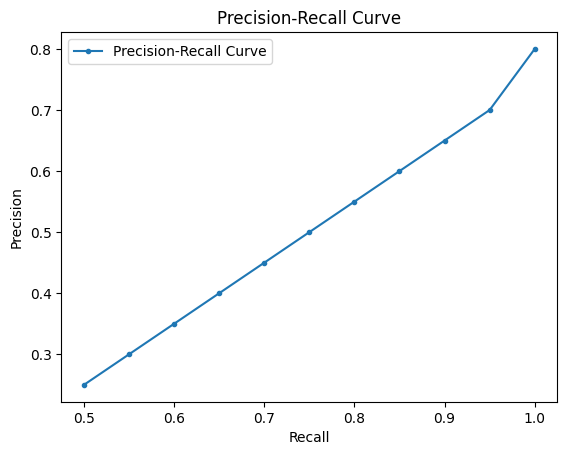

In [ ]:
import matplotlib.pyplot as plt

precisionaaa = [0.8, 0.7, 0.65, 0.6, 0.55, 0.5, 0.45, 0.4, 0.35, 0.3, 0.25]
recallaaa = [1.0, 0.95, 0.9, 0.85, 0.8, 0.75, 0.7, 0.65, 0.6, 0.55, 0.5]

# Plot the precision-recall curve
plt.plot(recallaaa, precisionaaa, marker='.', label='Precision-Recall Curve')

# Add labels and legend
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()

# Show the plot
plt.show()

In [ ]:
auc(precisionaaa,recallaaa)

0.42375000000000007

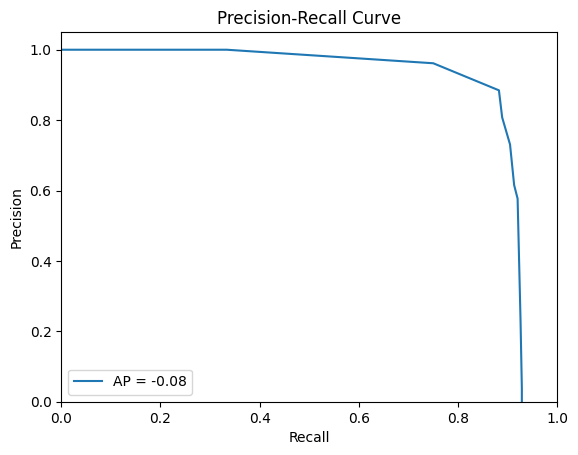

In [ ]:
import matplotlib.pyplot as plt

# Assuming your grouped dataframe with precision and recall values is named 'grouped_df'


# Calculate average precision (AP) using trapezoidal rule
ap = 0
for i in range(1, len(precisions)):
    ap += (recalls[i] - recalls[i-1]) * precisions[i]

# Plot the PR curve
plt.plot(sorted(recalls), precisions, label='AP = {:.2f}'.format(ap))
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.show()

In [ ]:
df['precision'] = df['TP'] / (df['TP'] + df['FP'])
df['recall'] = df['TP'] / (df['TP'] + df['FN'])

In [ ]:
dfzerofive = df[df['tresh_iou']==0.5]

In [ ]:
dfzerofive = dfzerofive.fillna(0)

In [ ]:
def calculate_ap(precisions, recalls, iou_thresh):
    # sort the recalls in descending order
    sorted_indices = np.argsort(recalls)[::-1]
    sorted_recalls = np.array(recalls)[sorted_indices]
    sorted_precisions = np.array(precisions)[sorted_indices]
    
    # initialize variables
    max_precisions = np.zeros_like(sorted_recalls)
    ap = 0
    
    # loop through each recall value
    for i in range(len(sorted_recalls)):
        # find the maximum precision value for recalls >= current recall value
        max_precision = 0
        for j in range(i, len(sorted_recalls)):
            if sorted_recalls[j] >= sorted_recalls[i]:
                max_precision = max(max_precision, sorted_precisions[j])
        
        # store the maximum precision value
        max_precisions[i] = max_precision
    
    # calculate the area under the precision-recall curve
    for i in range(len(sorted_recalls) - 1):
        delta_recall = sorted_recalls[i] - sorted_recalls[i+1]
        avg_precision = (max_precisions[i] + max_precisions[i+1]) / 2
        ap += delta_recall * avg_precision
    
    # divide by the total range of recall values to get the average precision
    ap /= sorted_recalls[0]
    
    return ap

In [ ]:
recalls = sorted(recalls)

In [ ]:
precisions = [1.0,
		 1.0,
		 0.9615384615384616,
		 0.8846153846153846,
		 0.8076923076923077,
		 0.7307692307692307,
		 0.6153846153846154,
		 0.5769230769230769,
		 0.23076923076923078,
		 0.038461538461538464,
		 0.0]

In [ ]:
recalls =[0.9285714285714286,
 0.9285714285714286,
 0.9259259259259259,
 0.92,
 0.9130434782608695,
 0.9047619047619048,
 0.8888888888888888,
 0.8823529411764706,
 0.75,
 0.3333333333333333,
 0.0]

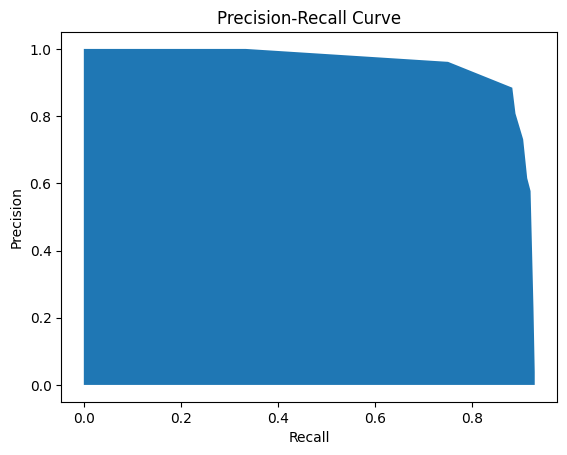

In [ ]:
import matplotlib.pyplot as plt


# Plot the precision-recall curve
plt.fill_between(sorted(recalls), precisions)

# Set the axis labels and title
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')

# Show the plot
plt.show()

In [ ]:
from sklearn.metrics import auc, average_precision_score
print(f'LR (No reg.) AUC-PR: {round(auc(precisions,recalls),2)}')

LR (No reg.) AUC-PR: 0.78


In [ ]:
auc([0.9523809523809523,
 0.8571428571428571,
 0.7142857142857143,
 0.6190476190476191,
 0.5714285714285714,
 0.5714285714285714,
 0.42857142857142855,
 0.2857142857142857,
 0.09523809523809523,
 0.0,
 0.0], [0.75,
 0.7307692307692307,
 0.6956521739130435,
 0.6666666666666666,
 0.65,
 0.65,
 0.5625,
 0.5,
 0.2222222222222222,
 0.0,
 0.0])

NameError: ignored

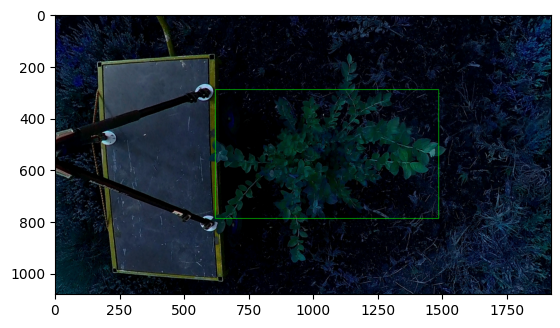

In [ ]:
cv2.rectangle(image, (x, y), (x+w, y+h), (0, 255, 0), 1, cv2.LINE_AA)
plt.imshow(image)